# Face Classification

In [1]:
#default_exp nb_09

In [2]:
from fastai.core import *
from fastai.vision import *
from kgl_deepfake.nb_00 import *
from kgl_deepfake.nb_01a import *
from kgl_deepfake.nb_02a import *
from kgl_deepfake.nb_03 import *

### Data

In [3]:
SOURCE = Path('../data_face/train_sample_faces')

In [4]:
src = ImageList.from_folder(SOURCE).split_by_rand_pct()

In [5]:
lab = r'([A-Z]+).png$'

In [6]:
bs, sz = 32, 128

In [7]:
def get_data(bs,size):
    data = (src.label_from_re(lab)
           .transform(get_transforms(),size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [8]:
data = get_data(bs, sz)

We have to add a jpg compression data augmentation as some compression will be applied on the test set. Fastai's transforms applies transforms on tensors, so we have to transforms them back to PIL Images as I don't think we can simulate JPEG compression directly on tensors.

In [16]:
#export
from torchvision import transforms

def _jpgcompression(x):
    quality = random.randrange(10, 100)
    x = transforms.ToPILImage()(x).convert("RGB")
    outputIoStream = BytesIO()
    x.save(outputIoStream, "JPEG", quality=quality, optimice=True)
    outputIoStream.seek(0)
    img = PIL.Image.open(outputIoStream)
    tensor = transforms.ToTensor()(img)
    return tensor

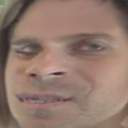

In [17]:
Image(_jpgcompression(data.train_ds[0][0].data))

In [18]:
#export
jpgcompression = TfmPixel(_jpgcompression, order=10)

In [19]:
def get_data(bs,size):
    data = (src.label_from_re(lab)
           .transform(get_transforms(xtra_tfms=[jpgcompression()]),size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [20]:
data = get_data(bs, sz)

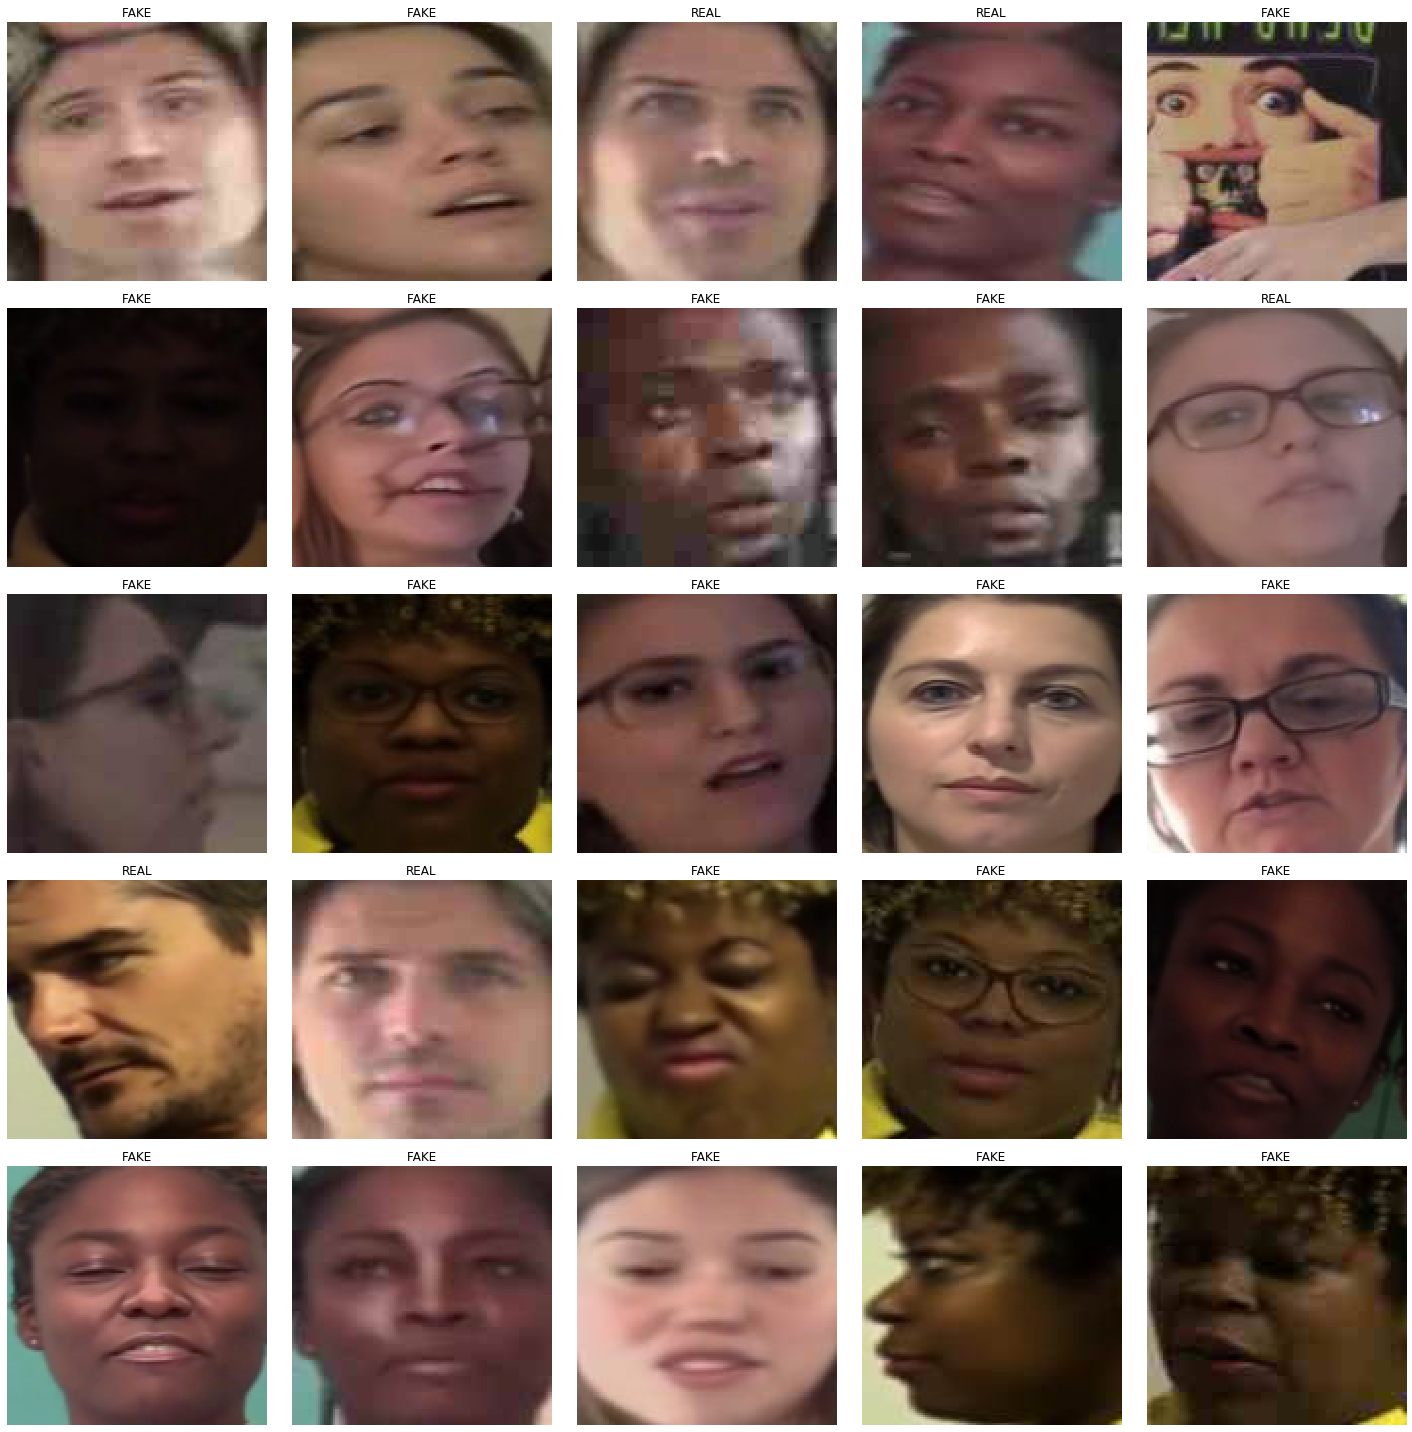

In [21]:
data.show_batch()

### Model

In [22]:
net = MesoNet()

In [23]:
learn = Learner(data, net, metrics=accuracy)

In [26]:
epochs, lr = 1, 1e-3

In [27]:
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.537343,0.491355,0.790345,00:04


## Fin

In [ ]:
from nbdev.export import *
notebook2script()